## Grupo 5 - WH6 - R
### Integrantes
- Diego
- Teresa
- Yoberson

# 1. Plots 

- **Graficos de  distribución absoluta, frecuencia y densidades de los pesos de los recién nacidos si la madre es fumadora o no**

Importamos los datos

In [22]:
library(ggplot2)  # plots packages
library(tidyr) # read and filter dataset
#library(tidyverse)
library(haven)  # read STATA.dta 
library(dplyr)  # filter dataset


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [13]:
#install.packages("ggplot2")

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Coms By Gigabyte\AppData\Local\Temp\RtmpAnPufX\downloaded_packages


In [17]:
#install.packages("tidyverse")

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Coms By Gigabyte\AppData\Local\Temp\RtmpAnPufX\downloaded_packages


In [23]:
peso <- read_dta("../../data/Pesos/peso.dta", encoding = "latin1")

In [24]:
head(peso)

faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13.5,16.5,122.3,109,12,12,1,1,1,0,4.691348,6.8125,0,2.6026900
7.5,16.5,122.3,133,6,12,2,1,0,0,4.890349,8.3125,0,2.0149031
0.5,16.5,122.3,129,NA,12,2,0,0,0,4.859812,8.0625,0,-0.6931472
15.5,16.5,122.3,126,12,12,2,1,0,0,4.836282,7.8750,0,2.7408400
27.5,16.5,122.3,134,14,12,2,1,1,0,4.897840,8.3750,0,3.3141861
7.5,16.5,122.3,118,12,14,6,1,0,0,4.770685,7.3750,0,2.0149031


In [25]:
#Creamos dummy "fumador" que indique si la madre es fumadora o no fumadora
peso$fumador <- (peso$cigs > 0)*1
# 1 si la madre es fumadora
# 0 si la madre no es fumadora

In [26]:
peso <- peso %>% mutate(fumador = case_when(fumador == 1 ~ "Madre Fumadora",
                                          fumador == 0 ~ "Madre No Fumadora"))

Multiples histogramas de los pesos de los recipen nacidos

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



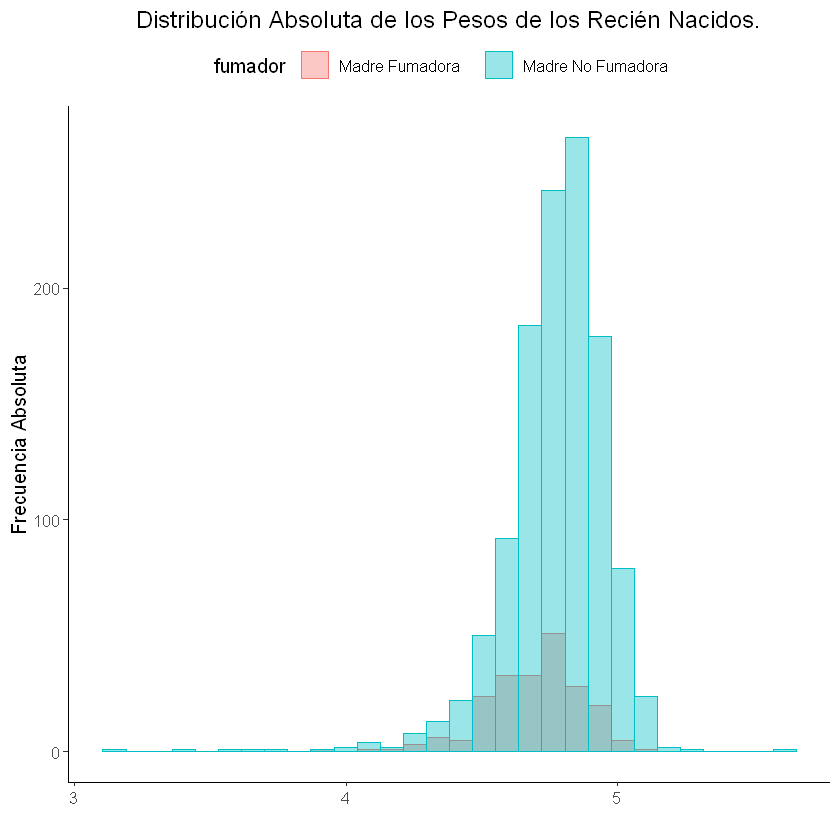

In [27]:

### Multiple histograms
theme_set(theme_classic() + theme(legend.position = "top"))

peso %>% 
 ggplot(aes(x=lbwght)) + geom_histogram(aes(color = fumador, fill = fumador),
                         alpha = 0.4, position = "identity") +
    labs(x = " ", y = "Frecuencia Absoluta", title = "Distribución Absoluta de los Pesos de los Recién Nacidos.") + 
     theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5))

Histogramas separados de los pesos de los recién nacidos

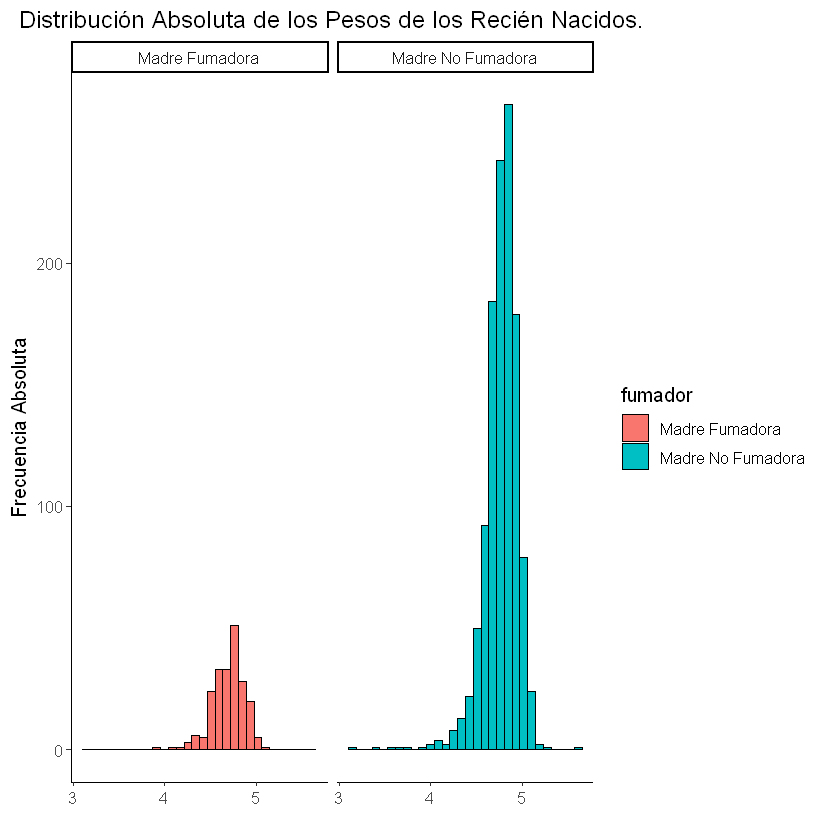

In [28]:
theme_set(theme_classic() + theme(legend.position = "right"))

peso %>% 
 ggplot(aes(x=lbwght)) + geom_histogram(aes(fill = fumador), bins = 30, color ="black") +
    labs(x = " ", y = "Frecuencia Absoluta", title = "Distribución Absoluta de los Pesos de los Recién Nacidos.") + 
     theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5)) +
    facet_wrap(~fumador)

Densidad de los pesos de los recién nacidos

Warning message:
"Ignoring unknown parameters: bins"


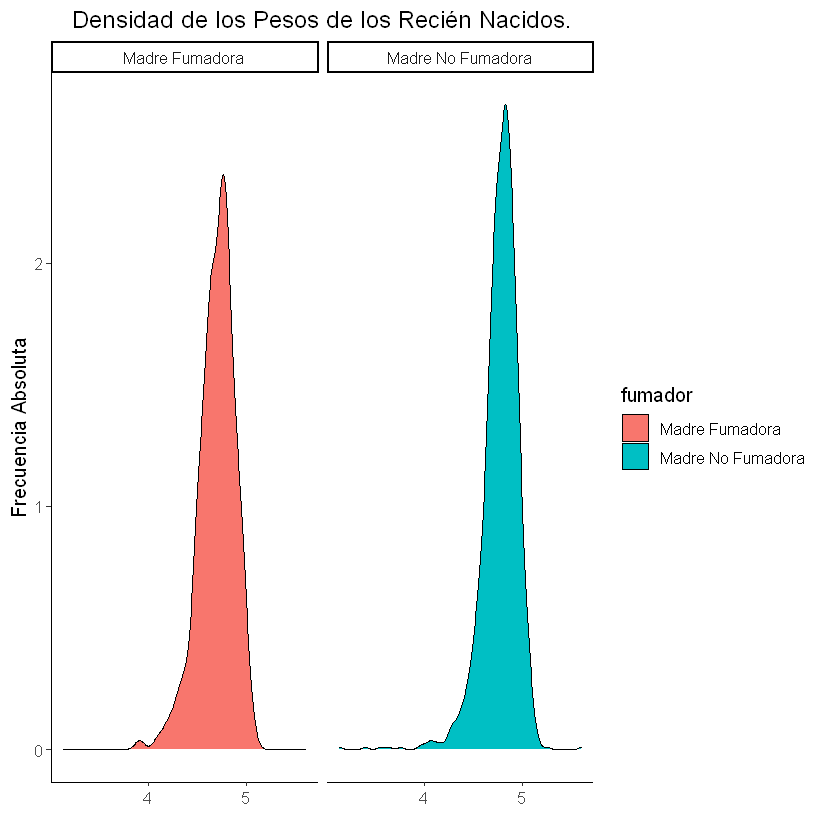

In [29]:
theme_set(theme_classic() + theme(legend.position = "right"))

peso %>% 
 ggplot(aes(x=lbwght)) + geom_density(aes(fill = fumador), bins = 30) +
    labs(x = " ", y = "Frecuencia Absoluta", title = "Densidad de los Pesos de los Recién Nacidos.") + 
     theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5)) +
    facet_wrap(~fumador)

**Crear un coefplot de las siguientes tres regresiones:**
- lbwght ~ Dummy
- lbwght ~ Dummy + mothedu
- lbwght~ Dummy + mothedu + lfaminc + white + Dummy:(mothedu + lfaminc + white)

1. Caso 1 **lbwght ~ Dummy**

In [46]:
#install.packages("sandwich")
#library(sandwich)


In [49]:
formula1 <- lbwght ~ fumador #fumador es nuestra dummy 

In [50]:
caso_1 <- lm(formula1, data=peso)

In [53]:
caso_1.coefs <- vcovHC(caso_1, type = 'HC')
caso_1.coefs

,(Intercept),fumadorMadre No Fumadora
(Intercept),0.0001582818,-0.0001582818
fumadorMadre No Fumadora,-0.0001582818,0.0001888275


In [ ]:
#install.packages("lmtest")
#library(lmtest)
#install.packages("arm")
#library(arm)

In [ ]:

#hacemos la fgrafica
fm1 <- glm(caso_1.coefs, data = peso, family = binomial)
#coefplot(fm1, parm = -1)
coefplot(fm1, keep = "!Intercept")

2. Caso 2 **lbwght ~ Dummy + motheduc**

In [62]:
formula2 <- lbwght ~ fumador + motheduc

In [63]:
caso_2 <- lm(formula2, data=peso)

In [64]:
caso_2.est <- summary(caso_2)
caso_2.est


Call:
lm(formula = formula2, data = peso)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.63334 -0.08727  0.02269  0.11865  0.82811 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              4.664751   0.028622 162.977  < 2e-16 ***
fumadorMadre No Fumadora 0.073028   0.014479   5.044 5.17e-07 ***
motheduc                 0.002588   0.002193   1.180    0.238    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1887 on 1384 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.0221,	Adjusted R-squared:  0.02069 
F-statistic: 15.64 on 2 and 1384 DF,  p-value: 1.916e-07


In [67]:
caso_2.coefs <- vcovHC(caso_2, type = 'HC')
caso_2.coefs

,(Intercept),fumadorMadre No Fumadora,motheduc
(Intercept),7.710147e-04,-7.733799e-05,-5.239496e-05
fumadorMadre No Fumadora,-7.733799e-05,1.999528e-04,-6.954604e-06
motheduc,-5.239496e-05,-6.954604e-06,4.482703e-06


In [ ]:
#hacemos la gráfica
fm2 <- glm(caso_2.coefs, data = peso, family = binomial)
#coefplot(fm2, parm = -1)
coefplot(fm2, keep = "!Intercept")

3. Caso 3 **lbwght ~ Dummy + motheduc + lfaminc + white + Dummy:(motheduc + lfaminc + white)

In [70]:
#construimos nuestro modelos de regresion básico 
formula3 <- lbwght ~ fumador + motheduc + lfaminc + white + fumador:(motheduc + lfaminc + white)

In [76]:
#regresionamos
caso_3 <- lm(formula3, data=peso)

In [77]:
caso_3.est <- summary(caso_3)
caso_3.est


Call:
lm(formula = formula3, data = peso)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.58590 -0.08906  0.02314  0.11778  0.81391 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        4.708451   0.087611  53.743   <2e-16 ***
fumadorMadre No Fumadora          -0.012595   0.093189  -0.135    0.893    
motheduc                          -0.007256   0.007687  -0.944    0.345    
lfaminc                            0.022608   0.015090   1.498    0.134    
white                              0.012435   0.032548   0.382    0.702    
fumadorMadre No Fumadora:motheduc  0.008570   0.008081   1.060    0.289    
fumadorMadre No Fumadora:lfaminc  -0.019471   0.016682  -1.167    0.243    
fumadorMadre No Fumadora:white     0.049757   0.035563   1.399    0.162    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1873 on 1379 degrees of freedom
  (1 observation deleted du

In [78]:
#calculamos los coeficientes 
caso_3.coefs <- vcovHC(caso_3, type = 'HC')
caso_3.coefs

,(Intercept),fumadorMadre No Fumadora,motheduc,lfaminc,white,fumadorMadre No Fumadora:motheduc,fumadorMadre No Fumadora:lfaminc,fumadorMadre No Fumadora:white
(Intercept),6.858347e-03,-6.858347e-03,-5.438157e-04,2.910137e-05,-5.443228e-04,5.438157e-04,-2.910137e-05,5.443228e-04
fumadorMadre No Fumadora,-6.858347e-03,7.899451e-03,5.438157e-04,-2.910137e-05,5.443228e-04,-6.031919e-04,5.039544e-06,-7.272383e-04
motheduc,-5.438157e-04,5.438157e-04,5.346247e-05,-3.653147e-05,2.285489e-05,-5.346247e-05,3.653147e-05,-2.285489e-05
lfaminc,2.910137e-05,-2.910137e-05,-3.653147e-05,1.987665e-04,-1.865450e-04,3.653147e-05,-1.987665e-04,1.865450e-04
white,-5.443228e-04,5.443228e-04,2.285489e-05,-1.865450e-04,1.025440e-03,-2.285489e-05,1.865450e-04,-1.025440e-03
fumadorMadre No Fumadora:motheduc,5.438157e-04,-6.031919e-04,-5.346247e-05,3.653147e-05,-2.285489e-05,5.904534e-05,-4.332692e-05,3.200657e-05
fumadorMadre No Fumadora:lfaminc,-2.910137e-05,5.039544e-06,3.653147e-05,-1.987665e-04,1.865450e-04,-4.332692e-05,2.501842e-04,-2.454907e-04
fumadorMadre No Fumadora:white,5.443228e-04,-7.272383e-04,-2.285489e-05,1.865450e-04,-1.025440e-03,3.200657e-05,-2.454907e-04,1.316285e-03


In [ ]:
#graficamos con coefplot
fm3 <- glm(caso_3.coefs, data = peso, family = binomial)
#coefplot(fm3, parm = -1)
coefplot(fm3, keep = "!Intercept")

# 2. Regular expresión

Use la base de datos mental_health_center para crear las columnas del tipo de institución del centro de salud y del RUC. Esta información está contenida en la columna Institución_ruc.

In [4]:
library(readxl)

In [23]:
data <- read_excel("../../data/Centro_salud/Centro_salud_mental.xls")
data

Departamento,Provincia,Distrito,UBIGEO,Dirección,Institución_ruc
CALLAO,CALLAO,LA PERLA,070104,AVENIDA LA PAZ CUADRA 3 LA PERLA CALLAO CALLAO,GOBIERNO REGIONAL 20147907487
LIMA,LIMA,RIMAC,150128,Calle Los Virreyes 205. Urbanización El Manzano Rimac. Costado de la Veterinaria Municipal,MINSA 20602217508
AREQUIPA,AREQUIPA,JOSE LUIS BUSTAMANTE Y RIVERO,040129,AVENIDA CARACAS NÚMERO 807 URBANIZACIÓN SIMÓN BOLÍVAR DISTRITO JOSE LUIS BUSTAMANTE Y RIVERO PROVINCIA AREQUIPA DEPARTAMENTO AREQUIPA,GOBIERNO REGIONAL 20172661794
LIMA,LIMA,COMAS,150110,Los Rosales Mz G8 Lt 02 altura de la 33 de la Av. Los,MINSA 20602217508
LA LIBERTAD,TRUJILLO,EL PORVENIR,130102,Mz Z1 Antenor Orrego - Rio Seco. Ref. Casa Blanca--- EL PORVENIR TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189
LA LIBERTAD,TRUJILLO,FLORENCIA DE MORA,130103,CALLE 20 DE JUNIO CUADRA 09 BARRIO 06 S/N FLORENCIA DE MORA TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189
LA LIBERTAD,TRUJILLO,EL PORVENIR,130102,OTROS MANUEL UBALDE NÚMERO 679 DISTRITO EL PORVENIR PROVINCIA TRUJILLO DEPARTAMENTO LA LIBERTAD,GOBIERNO REGIONAL 20218911189
LA LIBERTAD,TRUJILLO,TRUJILLO,130101,AVENIDA CESAR VALLEJO/ MZ 45 AA. HH. HUERTA BELLA S/N TRUJILLO TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189
APURIMAC,ANDAHUAYLAS,TALAVERA,030216,AVENIDA 28 DE JULIO 296 1 AL COSTADO DEL MERCADO DE TALAVERA TALAVERA ANDAHUAYLAS APURIMAC,GOBIERNO REGIONAL 20199917928
LORETO,LORETO,NAUTA,160301,CALLE MARAÑON NÚMERO S/N DISTRITO NAUTA PROVINCIA LORETO DEPARTAMENTO LORETO,GOBIERNO REGIONAL


In [26]:
INSTITUCIÓN <- c()

for (i in 1:length(data$Institución_ruc)){
        ins <-  gsub("[0-9]","", data$Institución_ruc[i])
        INSTITUCIÓN[i] <- ins
        print(ins)    
}

[1] "GOBIERNO REGIONAL "
[1] "MINSA "
[1] "GOBIERNO REGIONAL "
[1] "MINSA "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL"
[1] "MINSA "
[1] "MINSA "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "MINSA "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "MINSA "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL"
[1] "MINSA "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIER

In [39]:
RUC <- c()

for (i in 1:length(data$Institución_ruc)){
        r <-  gsub("[A-Z]","", data$Institución_ruc[i])
        INSTITUCIÓN[i] <- r
        print(r)    
}

[1] "  20147907487"
[1] " 20602217508"
[1] "  20172661794"
[1] " 20602217508"
[1] "  20218911189"
[1] "  20218911189"
[1] "  20218911189"
[1] "  20218911189"
[1] "  20199917928"
[1] " "
[1] " 20602251641"
[1] " 20602250602"
[1] "  20172661794"
[1] "  20490215850"
[1] "  20450736539"
[1] "  20145686548"
[1] "  20222308080"
[1] " 20602217508"
[1] "  20199565398"
[1] "  20170258054"
[1] "  20171001065"
[1] "  20165645325"
[1] "  20489252601"
[1] "  20602799973"
[1] "  20172661794"
[1] "  20603980248"
[1] "  20191045671"
[1] "  20490215850"
[1] " 20602250602"
[1] "  20170258054"
[1] "  20450241564"
[1] "  20171178585"
[1] "  20163833094"
[1] "  20156003817"
[1] " "
[1] " 20602251641"
[1] "  20491240742"
[1] "  20531320574"
[1] "  20167237895"
[1] "  20145686548"
[1] "  20145686548"
[1] "  20145686548"
[1] "  20156176240"
[1] "  20452308992"
[1] "  20486391279"
[1] " 20602250602"
[1] "  20172661794"
[1] "  20171001065"
[1] "  20411038506"
[1] "  20171178585"
[1] "  20162197461"
[1] "  20600

In [41]:
data <- data %>% add_column(RUC = RUC)
data <- data  %>% add_column(INSTITUCIÓN = INSTITUCIÓN)

ERROR: Error in add_column(., RUC = RUC): no se pudo encontrar la función "add_column"
